In [233]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [234]:
train_data = pd.read_csv("train.csv")#, usecols=["class", "viewCount", "commentCount", "likeCount", "dislikeCount", "title", "description"]) 
test_data = pd.read_csv("test.csv")#, usecols=["ID","viewCount", "commentCount", "likeCount", "dislikeCount", "title", "description"])

In [235]:
train_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [236]:
members = train_data["cast"]
members = members.dropna()

numcast = []

for i in members:
    number = sum(1 for c in i if c == "{")
    numcast.append(number)

numcast

[24,
 20,
 51,
 7,
 4,
 4,
 14,
 4,
 12,
 20,
 37,
 14,
 40,
 59,
 23,
 13,
 24,
 19,
 23,
 10,
 20,
 16,
 30,
 19,
 13,
 15,
 6,
 24,
 33,
 11,
 32,
 14,
 22,
 31,
 18,
 15,
 15,
 14,
 5,
 14,
 6,
 32,
 11,
 32,
 10,
 15,
 42,
 18,
 44,
 17,
 9,
 17,
 13,
 9,
 30,
 9,
 9,
 14,
 5,
 7,
 79,
 15,
 10,
 16,
 14,
 9,
 16,
 7,
 56,
 56,
 22,
 13,
 15,
 6,
 16,
 16,
 11,
 55,
 15,
 31,
 17,
 11,
 20,
 18,
 6,
 21,
 19,
 9,
 41,
 13,
 36,
 18,
 29,
 12,
 71,
 9,
 9,
 6,
 8,
 11,
 14,
 38,
 7,
 20,
 16,
 14,
 25,
 55,
 6,
 18,
 10,
 20,
 26,
 13,
 26,
 11,
 17,
 17,
 20,
 15,
 16,
 11,
 51,
 15,
 23,
 4,
 17,
 16,
 11,
 18,
 23,
 22,
 4,
 18,
 30,
 9,
 17,
 36,
 9,
 31,
 13,
 13,
 15,
 23,
 13,
 20,
 13,
 45,
 15,
 9,
 13,
 1,
 5,
 19,
 15,
 12,
 8,
 18,
 15,
 16,
 15,
 7,
 6,
 13,
 15,
 5,
 2,
 20,
 23,
 18,
 13,
 6,
 15,
 15,
 15,
 30,
 12,
 11,
 23,
 24,
 18,
 9,
 15,
 26,
 24,
 15,
 12,
 11,
 32,
 15,
 18,
 30,
 61,
 15,
 12,
 9,
 8,
 15,
 47,
 22,
 45,
 21,
 17,
 21,
 6,
 23,
 15,
 12,
 

In [242]:
train_data.isna(.sum)

SyntaxError: invalid syntax (<ipython-input-242-7f7b97e43cb9>, line 1)

In [237]:
companies = train_data["production_companies"]
companies = companies.dropna()

first = []
second = []
third = []
fourth = []
fifth = []

for string in companies:
    splits = string.split("'")
    company1 = splits[3]
    first.append(company1)
    multiples1 = splits[7:]
    if not multiples1:
        second.append('NA')
    else:
        company2 = multiples1[2]
        second.append(company2)
    multiples2 = multiples1[7:]
    if not multiples2:
        third.append('NA')
    else:
        company3 = multiples2[1]
        third.append(company3)
    multiples3 = multiples2[6:]
    if not multiples3:
        fourth.append('NA')
    else:
        company4 = multiples3[1]
        fourth.append(company4)
    multiples4 = multiples3[5:]
    if not multiples4:
        fifth.append('NA')
    else:
        company5 = multiples4[2]
        fifth.append(company5)

prod_companies = list(zip(first, second, third, fourth, fifth))
prod_companies

[('Paramount Pictures',
  'United Artists',
  'Metro-Goldwyn-Mayer (MGM)',
  'NA',
  'NA'),
 ('Walt Disney Pictures', 'NA', 'NA', 'NA', 'NA'),
 ('Bold Films', 'Blumhouse Productions', 'Right of Way Films', 'NA', 'NA'),
 ('Ghost House Pictures', 'North Box Productions', 'NA', 'NA', 'NA'),
 ('Walt Disney Pictures',
  'Jim Henson Productions',
  'Jim Henson Company, The',
  'NA',
  'NA'),
 ('Castle Rock Entertainment', 'NA', 'NA', 'NA', 'NA'),
 ('United Artists', 'NA', 'NA', 'NA', 'NA'),
 ('Twentieth Century Fox Film Corporation',
  'Amercent Films',
  'American Entertainment Partners L.P.',
  'Interscope Communications',
  'NA'),
 ('DreamWorks SKG', 'Jinks/Cohen Company', 'NA', 'NA', 'NA'),
 ('Double Feature Films',
  'Jersey Films',
  'Nina Saxon Film Design',
  'Metro-Goldwyn-Mayer (MGM)',
  'NA'),
 ('DreamWorks SKG',
  'Cruise/Wagner Productions',
  'Amblin Entertainment',
  'Twentieth Century Fox Film Corporation',
  'Blue Tulip Productions'),
 ('Hypnopolis', 'NA', 'NA', 'NA', 'NA'),

In [ ]:
# Genre, production country, boolean collection

(0, 20)

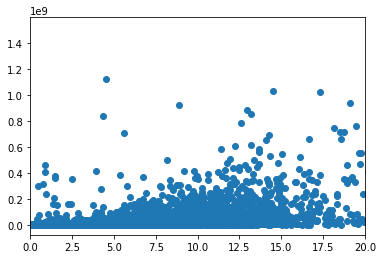

In [18]:
plt.scatter(train_data['popularity'], train_data['revenue'])
plt.xlim(0,20)

(50, 200)

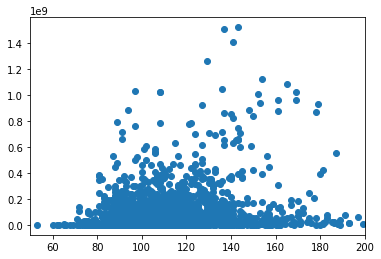

In [6]:
plt.scatter(train_data['runtime'], train_data['revenue'])
plt.xlim(50,200)

In [7]:
train_data['month'] = pd.DatetimeIndex(train_data['release_date']).month
train_data['year'] = pd.DatetimeIndex(train_data['release_date']).year

In [16]:
dfMonth = train_data["month"]
dfMonth["revenue"] = train_data["revenue"]

C:\Users\owenf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
dfMonth.boxplot(by = 'month')

AttributeError: 'Series' object has no attribute 'boxplot'

In [ ]:
plt.scatter(train_data['month'], train_data['revenue'])

In [10]:
def remove_colinear_features(x, threshold):
    y = x['revenue']
    x = x.drop(columns = ['revenue'])
    
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            if val >= threshold:
                drop_cols.append(col.values[0])
                
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    x['revenue'] = y
    
    return drops

In [11]:
x = remove_colinear_features(train_data, 0.6)

In [12]:
x

set()